In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

pd.options.display.float_format = "{:,.2f}".format
plt.figure(figsize=(40,40)) 
pd.set_option('display.max_columns', None)


<Figure size 2880x2880 with 0 Axes>

In [2]:
# Import Data
filePath = "./house_sales.csv"
df = pd.read_csv(filePath)
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.00,0,0,3,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.00,0,0,3,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.00,0,0,3,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.00,0,0,5,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.00,0,0,3,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000,3,2.50,1530,1131,3.00,0,0,3,8,1530,0,2009,0,98103,47.70,-122.35,1530,1509
21609,6600060120,20150223T000000,400000,4,2.50,2310,5813,2.00,0,0,3,8,2310,0,2014,0,98146,47.51,-122.36,1830,7200
21610,1523300141,20140623T000000,402101,2,0.75,1020,1350,2.00,0,0,3,7,1020,0,2009,0,98144,47.59,-122.30,1020,2007
21611,291310100,20150116T000000,400000,3,2.50,1600,2388,2.00,0,0,3,8,1600,0,2004,0,98027,47.53,-122.07,1410,1287


In [3]:
# Get the first 5 rows of the dataset
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.00,0,0,3,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.00,0,0,3,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.00,0,0,3,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.00,0,0,5,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.00,0,0,3,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


In [45]:
# Get only the numerical values and put into a DF
numericalDf = df[ ["price", "sqft_living", "sqft_lot", "sqft_above", "sqft_basement", "yr_built", "yr_renovated", "zipcode", "lat", "long"]]
numericalDf

# Get only the categorical columns and put into DF

,price,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,221900,1180,5650,1180,0,1955,0,98178,47.51,-122.26
1,538000,2570,7242,2170,400,1951,1991,98125,47.72,-122.32
2,180000,770,10000,770,0,1933,0,98028,47.74,-122.23
3,604000,1960,5000,1050,910,1965,0,98136,47.52,-122.39
4,510000,1680,8080,1680,0,1987,0,98074,47.62,-122.05
...,...,...,...,...,...,...,...,...,...,...
21608,360000,1530,1131,1530,0,2009,0,98103,47.70,-122.35
21609,400000,2310,5813,2310,0,2014,0,98146,47.51,-122.36
21610,402101,1020,1350,1020,0,2009,0,98144,47.59,-122.30
21611,400000,1600,2388,1600,0,2004,0,98027,47.53,-122.07


In [37]:
df1 = df.drop(["date"], axis=1)
df1

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900,3,1.00,1180,5650,1.00,0,0,3,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,538000,3,2.25,2570,7242,2.00,0,0,3,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,180000,2,1.00,770,10000,1.00,0,0,3,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,604000,4,3.00,1960,5000,1.00,0,0,5,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,510000,3,2.00,1680,8080,1.00,0,0,3,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000,3,2.50,1530,1131,3.00,0,0,3,8,1530,0,2009,0,98103,47.70,-122.35,1530,1509
21609,6600060120,400000,4,2.50,2310,5813,2.00,0,0,3,8,2310,0,2014,0,98146,47.51,-122.36,1830,7200
21610,1523300141,402101,2,0.75,1020,1350,2.00,0,0,3,7,1020,0,2009,0,98144,47.59,-122.30,1020,2007
21611,291310100,400000,3,2.50,1600,2388,2.00,0,0,3,8,1600,0,2004,0,98027,47.53,-122.07,1410,1287


In [23]:
print(df.waterfront[df.waterfront == 1].shape)
print(df.waterfront[df.waterfront == 0].shape)
df.view.unique()
df.condition.unique()
df.sqft_basement
df.yr_renovated.unique()
df.zipcode.unique()

(163,)
(21450,)


array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039])

In [4]:
# Describing the columns with basic statistics
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,"21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00"
mean,"4,580,301,520.86","540,088.14",3.37,2.11,"2,079.90","15,106.97",1.49,0.01,0.23,3.41,7.66,"1,788.39",291.51,"1,971.01",84.40,"98,077.94",47.56,-122.21,"1,986.55","12,768.46"
std,"2,876,565,571.31","367,127.20",0.93,0.77,918.44,"41,420.51",0.54,0.09,0.77,0.65,1.18,828.09,442.58,29.37,401.68,53.51,0.14,0.14,685.39,"27,304.18"
min,"1,000,102.00","75,000.00",0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,"1,900.00",0.00,"98,001.00",47.16,-122.52,399.00,651.00
25%,"2,123,049,194.00","321,950.00",3.00,1.75,"1,427.00","5,040.00",1.00,0.00,0.00,3.00,7.00,"1,190.00",0.00,"1,951.00",0.00,"98,033.00",47.47,-122.33,"1,490.00","5,100.00"
50%,"3,904,930,410.00","450,000.00",3.00,2.25,"1,910.00","7,618.00",1.50,0.00,0.00,3.00,7.00,"1,560.00",0.00,"1,975.00",0.00,"98,065.00",47.57,-122.23,"1,840.00","7,620.00"
75%,"7,308,900,445.00","645,000.00",4.00,2.50,"2,550.00","10,688.00",2.00,0.00,0.00,4.00,8.00,"2,210.00",560.00,"1,997.00",0.00,"98,118.00",47.68,-122.12,"2,360.00","10,083.00"
max,"9,900,000,190.00","7,700,000.00",33.00,8.00,"13,540.00","1,651,359.00",3.50,1.00,4.00,5.00,13.00,"9,410.00","4,820.00","2,015.00","2,015.00","98,199.00",47.78,-121.31,"6,210.00","871,200.00"


In [ ]:
# CHALLENGE: What do we want to find out when understanding the data. What information can we get? 
# Check the datatypes from categorical, to numerical 

# Which columns do we want to feature transform? 
# standardize all the data types that are numerical

In [24]:
# Check the quantiles for the dataframe for all columns
df.quantile([.05, .95])

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0.05,"512,480,335.00","210,000.00",2.00,1.00,940.00,"1,800.00",1.00,0.00,0.00,3.00,6.00,850.00,0.00,"1,915.00",0.00,"98,004.00",47.31,-122.39,"1,140.00","1,999.20"
0.95,"9,297,300,429.00","1,156,480.00",5.00,3.50,"3,760.00","43,339.20",2.00,0.00,2.00,5.00,10.00,"3,400.00","1,190.00","2,011.00",0.00,"98,177.00",47.75,-121.98,"3,300.00","37,062.80"


In [25]:
# check for total number of null values in each column
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.00,-0.02,0.00,0.01,-0.01,-0.13,0.02,-0.00,0.01,-0.02,0.01,-0.01,-0.01,0.02,-0.02,-0.01,-0.00,0.02,-0.00,-0.14
price,-0.02,1.00,0.31,0.53,0.70,0.09,0.26,0.27,0.40,0.04,0.67,0.61,0.32,0.05,0.13,-0.05,0.31,0.02,0.59,0.08
bedrooms,0.00,0.31,1.00,0.52,0.58,0.03,0.18,-0.01,0.08,0.03,0.36,0.48,0.30,0.15,0.02,-0.15,-0.01,0.13,0.39,0.03
bathrooms,0.01,0.53,0.52,1.00,0.75,0.09,0.50,0.06,0.19,-0.12,0.66,0.69,0.28,0.51,0.05,-0.20,0.02,0.22,0.57,0.09
sqft_living,-0.01,0.70,0.58,0.75,1.00,0.17,0.35,0.10,0.28,-0.06,0.76,0.88,0.44,0.32,0.06,-0.20,0.05,0.24,0.76,0.18
sqft_lot,-0.13,0.09,0.03,0.09,0.17,1.00,-0.01,0.02,0.07,-0.01,0.11,0.18,0.02,0.05,0.01,-0.13,-0.09,0.23,0.14,0.72
floors,0.02,0.26,0.18,0.50,0.35,-0.01,1.00,0.02,0.03,-0.26,0.46,0.52,-0.25,0.49,0.01,-0.06,0.05,0.13,0.28,-0.01
waterfront,-0.00,0.27,-0.01,0.06,0.10,0.02,0.02,1.00,0.40,0.02,0.08,0.07,0.08,-0.03,0.09,0.03,-0.01,-0.04,0.09,0.03
view,0.01,0.40,0.08,0.19,0.28,0.07,0.03,0.40,1.00,0.05,0.25,0.17,0.28,-0.05,0.10,0.08,0.01,-0.08,0.28,0.07
condition,-0.02,0.04,0.03,-0.12,-0.06,-0.01,-0.26,0.02,0.05,1.00,-0.14,-0.16,0.17,-0.36,-0.06,0.00,-0.01,-0.11,-0.09,-0.00


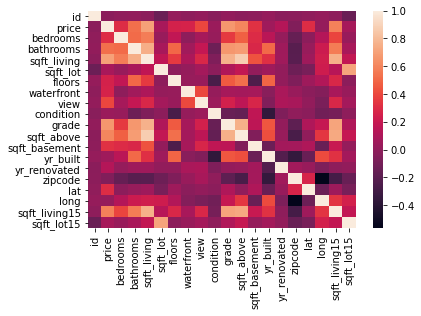

In [27]:
# check heatmap of data correlation
sns.heatmap(df.corr())
df.corr()

In [30]:
# Find the Correlation of the data to get initial relationships
highPositiveCorrelation = df.corr()[df.corr(method='pearson') > 0.7][df.corr(method='pearson') < 1]
# Get their indexes for plotting charts 
positiveCorrIndex = highPositiveCorrelation.stack().index
positiveCorrIndex

MultiIndex([(        'price',   'sqft_living'),
            (    'bathrooms',   'sqft_living'),
            (  'sqft_living',         'price'),
            (  'sqft_living',     'bathrooms'),
            (  'sqft_living',         'grade'),
            (  'sqft_living',    'sqft_above'),
            (  'sqft_living', 'sqft_living15'),
            (     'sqft_lot',    'sqft_lot15'),
            (        'grade',   'sqft_living'),
            (        'grade',    'sqft_above'),
            (        'grade', 'sqft_living15'),
            (   'sqft_above',   'sqft_living'),
            (   'sqft_above',         'grade'),
            (   'sqft_above', 'sqft_living15'),
            ('sqft_living15',   'sqft_living'),
            ('sqft_living15',         'grade'),
            ('sqft_living15',    'sqft_above'),
            (   'sqft_lot15',      'sqft_lot')],
           )

In [31]:
# Check for negative correlations
highNegativeCorr = df.corr()[df.corr(method='pearson') < -0.5]
highNegativeCorr

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
price,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
bedrooms,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
bathrooms,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
sqft_living,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
sqft_lot,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
floors,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
waterfront,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
view,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
condition,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


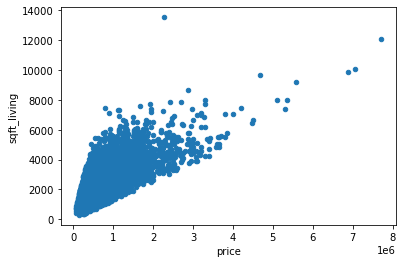

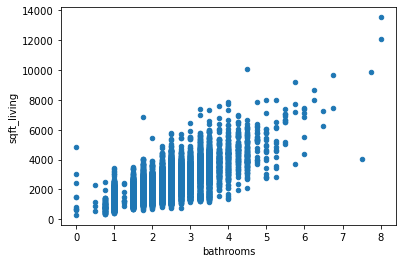

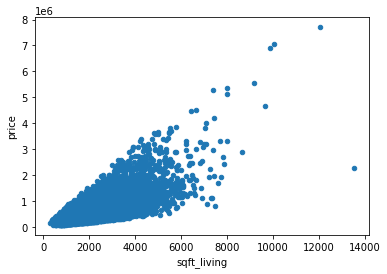

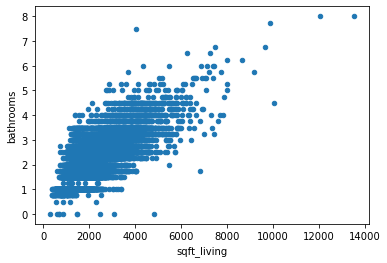

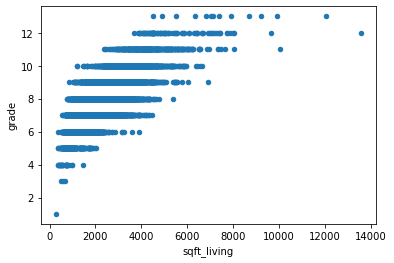

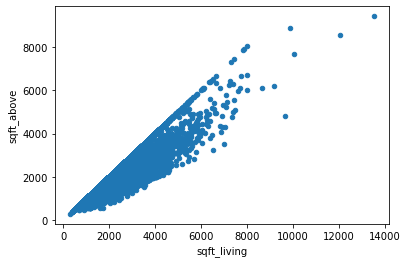

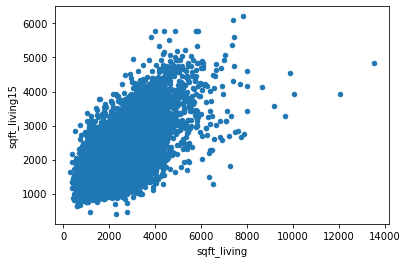

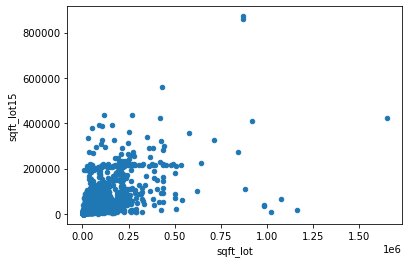

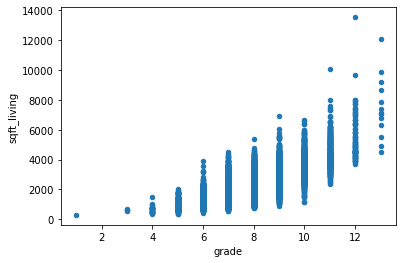

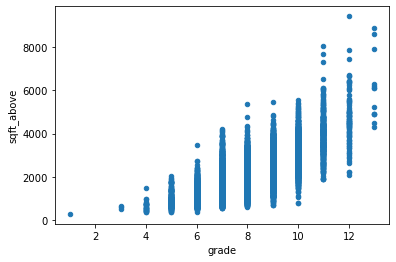

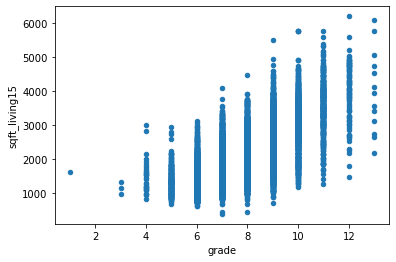

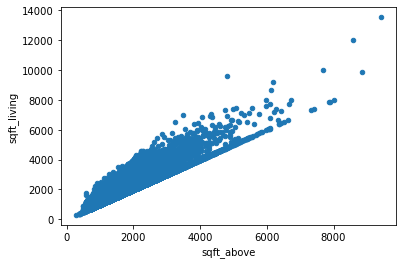

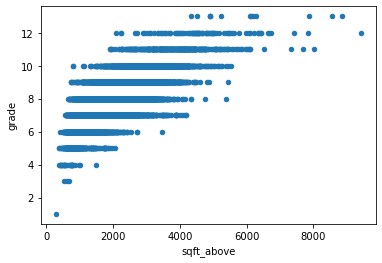

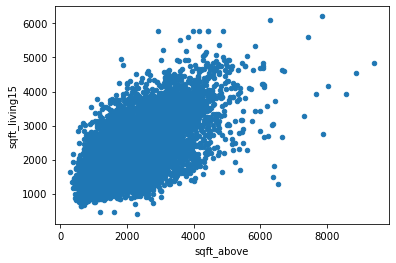

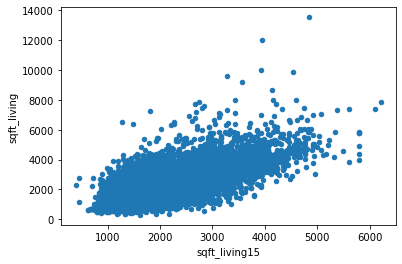

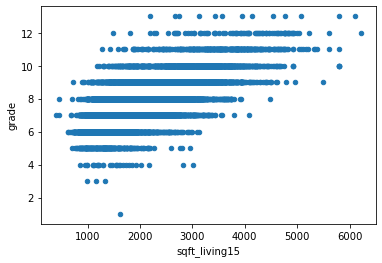

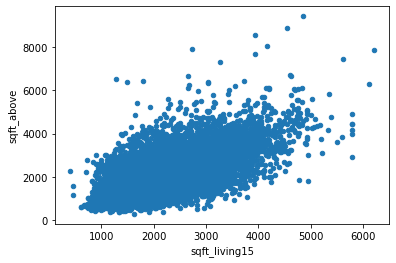

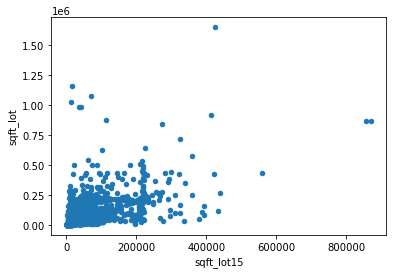

In [33]:
# plot the charts based on the correlated features
for (feat1, feat2) in positiveCorrIndex:
    df.plot.scatter(x = feat1, y = feat2)


In [ ]:
# CHALLENGE: Revove outliers in the lowest and highest quintiles

In [ ]:
#  CHALLENGE: Feature Transform the Data
# 1) Scale the Data (Standardize and Scale)

In [40]:
# Scaling the data
# CHALLENGE: Only do MinMax scaler for non-categorical valuves
scaler = MinMaxScaler()
minMaxDf = pd.DataFrame(scaler.fit_transform(df1), index=df1.index, columns=df1.columns)
minMaxDf

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0.72,0.02,0.09,0.12,0.07,0.00,0.00,0.00,0.00,0.50,0.50,0.10,0.00,0.48,0.00,0.89,0.57,0.22,0.16,0.01
1,0.65,0.06,0.09,0.28,0.17,0.00,0.40,0.00,0.00,0.50,0.50,0.21,0.08,0.44,0.99,0.63,0.91,0.17,0.22,0.01
2,0.57,0.01,0.06,0.12,0.04,0.01,0.00,0.00,0.00,0.50,0.42,0.05,0.00,0.29,0.00,0.14,0.94,0.24,0.40,0.01
3,0.25,0.07,0.12,0.38,0.13,0.00,0.00,0.00,0.00,1.00,0.50,0.08,0.19,0.57,0.00,0.68,0.59,0.10,0.17,0.00
4,0.20,0.06,0.09,0.25,0.10,0.00,0.00,0.00,0.00,0.50,0.58,0.15,0.00,0.76,0.00,0.37,0.74,0.39,0.24,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,0.03,0.04,0.09,0.31,0.09,0.00,0.80,0.00,0.00,0.50,0.58,0.14,0.00,0.95,0.00,0.52,0.87,0.14,0.19,0.00
21609,0.67,0.04,0.12,0.31,0.15,0.00,0.40,0.00,0.00,0.50,0.58,0.22,0.00,0.99,0.00,0.73,0.57,0.13,0.25,0.01
21610,0.15,0.04,0.06,0.09,0.06,0.00,0.40,0.00,0.00,0.50,0.50,0.08,0.00,0.95,0.00,0.72,0.71,0.18,0.11,0.00
21611,0.03,0.04,0.09,0.31,0.10,0.00,0.40,0.00,0.00,0.50,0.58,0.14,0.00,0.90,0.00,0.13,0.61,0.37,0.17,0.00


In [41]:
minMaxDf.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,"21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00","21,613.00"
mean,0.46,0.06,0.10,0.26,0.14,0.01,0.20,0.01,0.06,0.60,0.55,0.16,0.06,0.62,0.04,0.39,0.65,0.25,0.27,0.01
std,0.29,0.05,0.03,0.10,0.07,0.03,0.22,0.09,0.19,0.16,0.10,0.09,0.09,0.26,0.20,0.27,0.22,0.12,0.12,0.03
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.21,0.03,0.09,0.22,0.09,0.00,0.00,0.00,0.00,0.50,0.50,0.10,0.00,0.44,0.00,0.16,0.51,0.16,0.19,0.01
50%,0.39,0.05,0.09,0.28,0.12,0.00,0.20,0.00,0.00,0.50,0.50,0.14,0.00,0.65,0.00,0.32,0.67,0.24,0.25,0.01
75%,0.74,0.07,0.12,0.31,0.17,0.01,0.40,0.00,0.00,0.75,0.58,0.21,0.12,0.84,0.00,0.59,0.84,0.33,0.34,0.01
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [ ]:
# Conduct a PCA Algo

In [ ]:
# Conduct a Random Forest Algo